I/we certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching, or contributions during the production of this work.

####**Part I: Building a Basic NN [20 points]**

#### **Importing necessary packages**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping, ModelCheckpoint

#### **Loading the Dataset**

In [2]:
file = pd.read_csv('income_dataset.csv')
file.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


#### **Shape of the dataset:**
**Number of rows:** 32561
**Number of columns:** 15

In [3]:
file.shape

(32561, 15)

#### **Renaming the Column Names for convenience**

In [4]:
file.rename({"age": "Age",
           "workclass": "Worker_Class",
           "fnlwgt": "Final_Weight",
           "education": "Education",
           "education.num": "Years_Of_Education",
           "marital.status": "Marital_Status",
           "occupation": "Occupation",
           "relationship": "Relationship",
           "race": "Race",
           "sex": "Gender",
           "capital.gain": "Capital_Gain",
           "capital.loss": "Capital_Loss",
           "hours.per.week": "Hours_Per_Week",
           "native.country":"Country",
            "income": "Income"},
            axis=1,
            inplace=True)

#### **Extracting the names of the Numeric & Categorical columns**

In [5]:
# If datatype of a column is not an object --> Numerical Column
numeric_vectors = [i for i in file.columns if file[i].dtypes != 'object']
print("Numerical Columns:", numeric_vectors)

# If datatype of a column is an object --> Categorical Column
categorical_vectors = [i for i in file.columns if file[i].dtypes == 'object']
print("Categorical Columns:", categorical_vectors)

Numerical Columns: ['Age', 'Final_Weight', 'Years_Of_Education', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']
Categorical Columns: ['Worker_Class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender', 'Country', 'Income']


#### **Note:**
Though `education.num` might look like a numerical column, it reflects exactly what the `education` column tries to convey. This makes it a categorical column.

#### **Deriving insights from the Numerical Columns**

In [6]:
file[numeric_vectors].describe()

,Age,Final_Weight,Years_Of_Education,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### **Deriving Insights from the Categorical Columns**

In [7]:
file[categorical_vectors].describe()

,Worker_Class,Education,Marital_Status,Occupation,Relationship,Race,Gender,Country,Income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


**Main Statistics**
* With `file[numeric_vectors].describe()` and `file[categorical_vectors].describe()`, we can see that,
  * The majority of the working people from the dataset are paid either **less than or equal to 50,000 dollars annually**.
  * On an average, working people from the dataset are at least **38 years old** with the youngest person being 17 and the oldest person being 90 years old (could also be a potential outlier). 
  * **While Males** (Race & Gender) from the **United States** (Country) contribute the most to the dataset.
  * They have at least completed **10 years of education** and some records have had a maximum of 20 years of education.
  * On average, most people work **40-hours a week** while some might even work up to a maximum of **100-hours**.
  * The workers have been divided into **9 different classes** with **'Private'** workers being the most frequent with **22696** records.
  * The maritial status of the majority number of people from the dataset is being **married to a civilian spouse** (Married-civ-spouse).

In [8]:
import warnings
warnings.filterwarnings("ignore")

#### **Plotting a CountPlot to know the number of records that have income greater and lesser than 50K dollars annually**

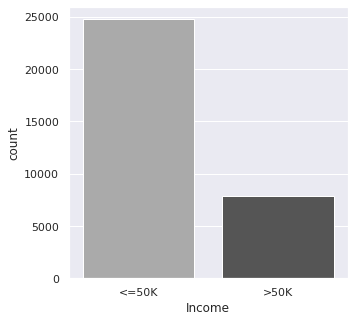

In [9]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.countplot(file["Income"], palette="gray_r")

#### **Observation:**

* The dataset that we have  is **imbalanced and skewed** i.e. the number of people who earn above 50K is lesser than the number of people who earn less than 50K.
* Since, there are only two possible predictions (above or below 50K), this is a **binary classification** task.

## **Data Pre-Processing**

### **Addressing the Missing values in the dataset**

In [10]:
file.isna().sum()

Age                   0
Worker_Class          0
Final_Weight          0
Education             0
Years_Of_Education    0
Marital_Status        0
Occupation            0
Relationship          0
Race                  0
Gender                0
Capital_Gain          0
Capital_Loss          0
Hours_Per_Week        0
Country               0
Income                0
dtype: int64

#### **While using isna(), the null values aren't detected since they are disguised as a string "?"**
- To prevent this from happening, the string "?" should first be replaced with NaN
- We can then use isna() to understand the missing values that the dataset has.

In [11]:
file = file.replace("?", np.nan) 

In [12]:
file.isna().sum()

Age                      0
Worker_Class          1836
Final_Weight             0
Education                0
Years_Of_Education       0
Marital_Status           0
Occupation            1843
Relationship             0
Race                     0
Gender                   0
Capital_Gain             0
Capital_Loss             0
Hours_Per_Week           0
Country                583
Income                   0
dtype: int64

#### **We can now see that the only columns that had "?"/missing values were:**
- Worker_Class
- Occupation
- Country

### **Data Imputation**
Replacing the null values with the mode (Most Occuring Value) of that particular vector.

In [13]:
mode_wc = file["Worker_Class"].mode()[0]
mode_o = file["Occupation"].mode()[0]
mode_c = file["Country"].mode()[0]

print("The mode of 'Worker_Class' is:", mode_wc)
print("The mode of 'Occupation' is:", mode_o)
print("The mode of 'Country' is:", mode_c)

file['Worker_Class'].fillna(mode_wc, inplace=True)
file['Occupation'].fillna(mode_o, inplace=True)
file['Country'].fillna(mode_c, inplace=True)

The mode of 'Worker_Class' is: Private
The mode of 'Occupation' is: Prof-specialty
The mode of 'Country' is: United-States


### **Encoding the Categorical Columns**
We use `LabelEncoder()` inside `sklearn.preprocessing` to encode all the categorical columns.

In [14]:
encoder = LabelEncoder()

for i in file.columns:
    if i in categorical_vectors:
        file[i] = encoder.fit_transform(file[i])

### **Normalizing the Numerical Columns**
We use the `MinMaxScaler()` inside `sklearn.preprocessing` to normalize the numerical values between the range 0 to 1.

In [15]:
scaler = MinMaxScaler()

to_scale = ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']
file[to_scale] = scaler.fit_transform(file[to_scale])

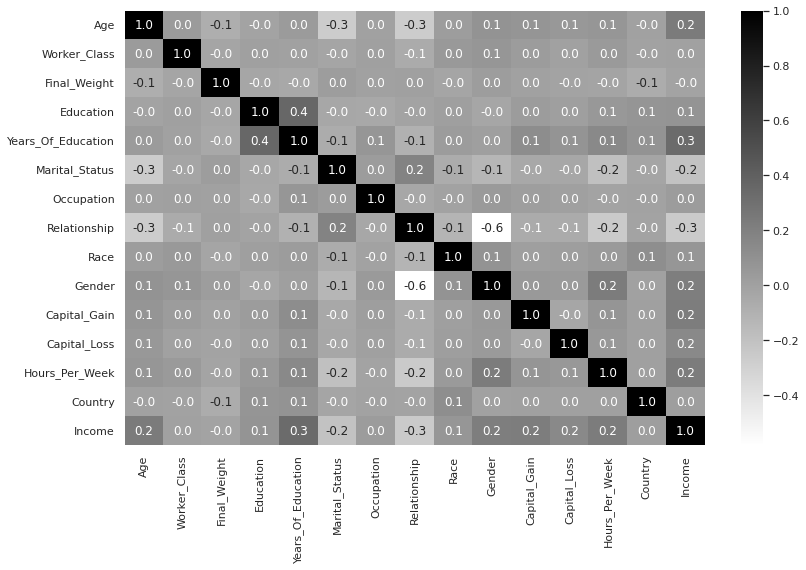

In [16]:
sns.set(rc = {'figure.figsize':(13,8)})
sns.heatmap(file.corr(), annot=True, fmt='.1f', cmap="gray_r")
plt.show()

#### **Observations:**
* `Age` & `Years_Of_Education` seems to have the most impactful positive correlation with the target variable `income`.
* Whereas, `Marital_Status` & `Relationship` are negatively correlated.
* From the corrplot, we can see that the `Final_Weight` has almost no correlation with the target variable (income).
* Also, the `Worker_Class` column indicates the exactly what the `Education` column does.

#### **Dropping the `Education` and `Final_Weight` columns**

In [17]:
file.drop(["Education", "Final_Weight"], axis = 1, inplace = True)

Since `Final_Weight` has little to no impact on the target variable and the `Worker_Class` column indicates exactly what the Education column does, we're dropping both of the columns.

## **Data after Pre-Processing (Encoding & Normalization)**

In [18]:
file.head(5)

,Age,Worker_Class,Years_Of_Education,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Country,Income
0,1.000000,3,9,6,9,1,4,0,0.0,1.000000,0.397959,38,0
1,0.890411,3,9,6,3,1,4,0,0.0,1.000000,0.173469,38,0
2,0.671233,3,10,6,9,4,2,0,0.0,1.000000,0.397959,38,0
3,0.506849,3,4,0,6,4,4,0,0.0,0.895317,0.397959,38,0
4,0.328767,3,10,5,9,3,4,0,0.0,0.895317,0.397959,38,0


## **Data Visualization (Exploratory Data Analysis)**

#### **Subplots to visualize how Gender Impacts Income**
The comparision is done with respect to other input vectors like Age of the workers, Number of years of education, hours_of_work_per_week, and Capital Gains.

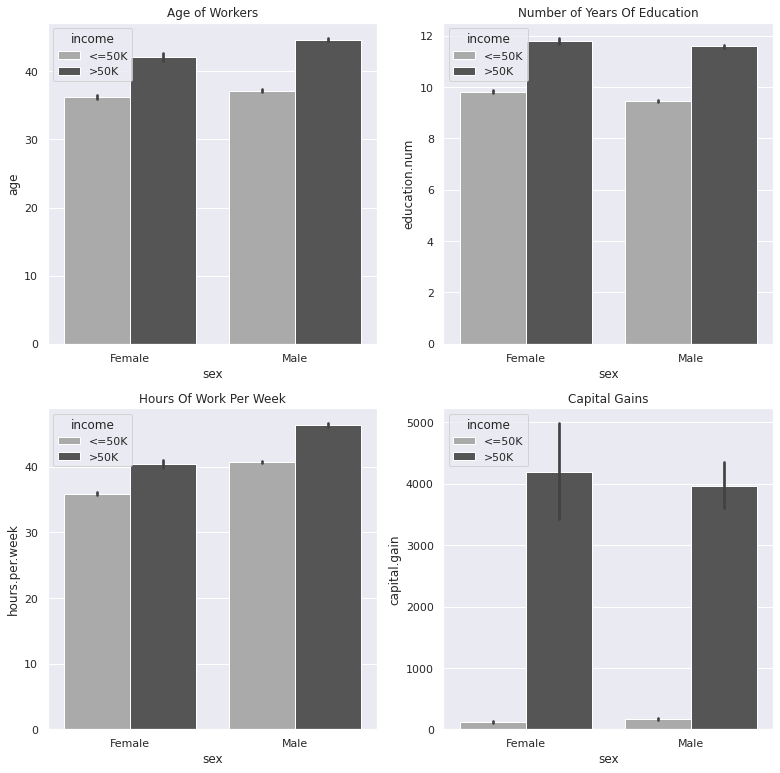

In [19]:
temp_file = pd.read_csv('income_dataset.csv')
temp_file = temp_file.replace("?", np.nan) 
temp_file['occupation'].fillna(temp_file["occupation"].mode()[0], inplace=True)
temp_file['workclass'].fillna(temp_file["workclass"].mode()[0], inplace=True)

columns = ["age", "education.num", "hours.per.week", "capital.gain"]
titles = ["Age of Workers", "Number of Years Of Education", "Hours Of Work Per Week", "Capital Gains"]
plt.figure(figsize = (13,13))

for i,v in enumerate(zip(columns, titles)):
    plt.subplot(2, 2, i+1)
    figure = sns.barplot(x = "sex", y = v[0], hue = "income", data = temp_file, palette = "gray_r")
    figure.set_title(v[1])

#### **Observations:**
* This graph compares **how `Gender` influences a worker's salary** with respect to other vectors like `age`, `education.num`, & `hours.per.week`.
* **Females retire a little early than males.** For this reason, as the age of the males increase, they are paid more. In simple terms, **males earn more** at the time of their retirement. 
* The **number of years of education** (`education.num`) is **Gender-Neutal and unbiased**. Workers who've had more education are paid more than the ones that don't.
* Males & Females who earn more than 50K per years have **atleast had 10 years of Education**.
* **Females** who earn more than 50K have had **more capital gains** when compared to males in the same category.

#### **Comparing The Correlation Income & Marital Status of an individual**

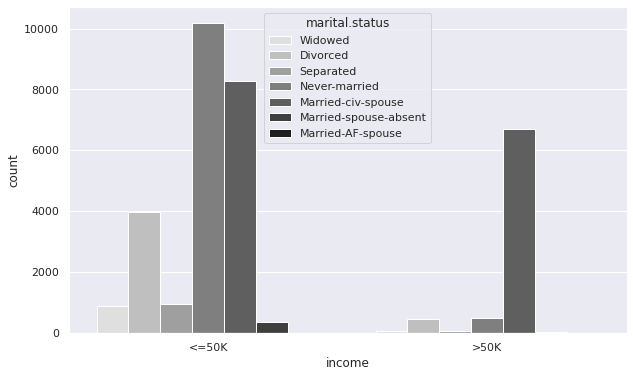

In [20]:
sns.set(rc = {'figure.figsize':(10,6)})

sns.countplot(x='income', hue='marital.status', data=temp_file, palette = "gray_r")

#### **Observations:**
* Individuals who are **Married-To-A-Civilian_Spouse earn more than 50K**.
* Whereas, workers who are **widowed, divorced, separated, married-spouse-absent & married-AF-spouse** contribute to a really small minority of people who earn 50K and above.
* Most workers who are **never-married**|, earn less than 50K.

#### **Comparing how the Occupation of an Individual affects his/her Income**

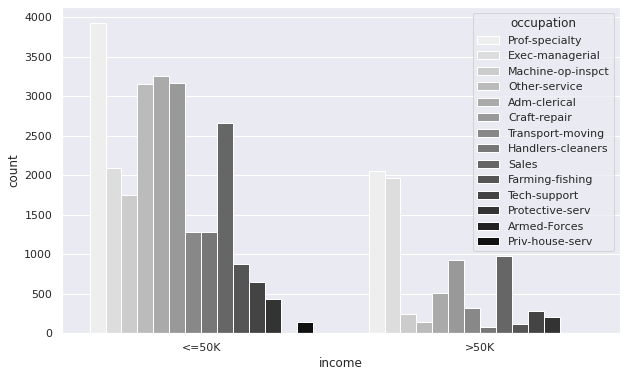

In [21]:
sns.countplot(x='income', hue='occupation', data=temp_file, palette = "gray_r")

#### **Observations:**
* `Prof-speciality` workers have the **most probability of earning 50K** and more.
* They are followed by `Exec_Managerial` and `Tech-Support` workers.
* `Prof-speciality` also contribute the most to the below 50K category. Hence, `Prof-speciality` in general have the **highest earning potential** regardless of their income category.
* Another interesting observation is that there's no entry of Armed-forces in below 50K. This could mean that all **Armed-forces workers** earn more than 50K annually.

#### **Visualizing which class of workers earn the most & least**

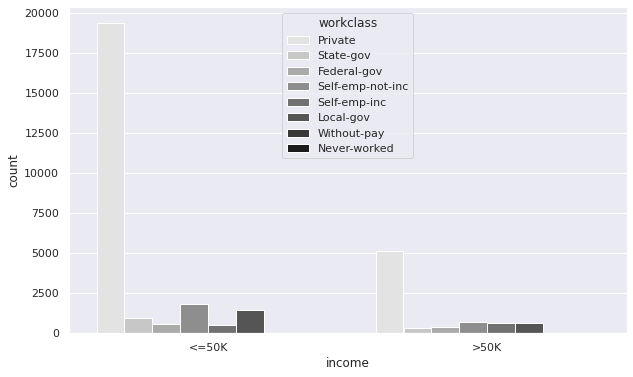

In [22]:
sns.countplot(x='income', hue='workclass', data=temp_file, palette = "gray_r")

#### **Observations:**

* `Private` sector employees dominate the 50K and above category.
* In general, `Private` sector employees contribute the most to both the categories indicating that they have the **highest earning potential**.
* Workers who belong to the `Without-pay` and `Never-worked` class have had little to no contributions in the dataset.

#### **Visualizing how the relationship status of a person impacts his/her Income**

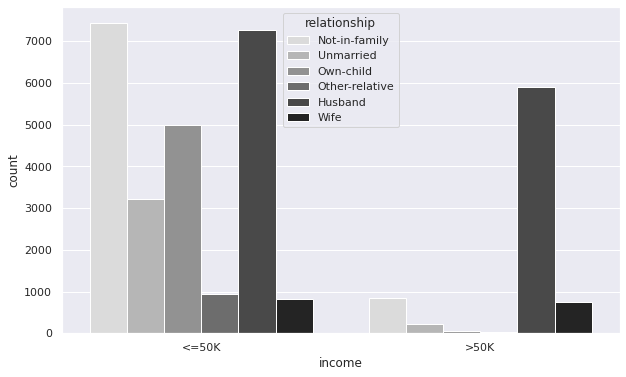

In [23]:
sns.countplot(x='income', hue='relationship', data=temp_file, palette = "gray_r")

#### **Observations:**
* Workers who are also `husbands` **earn above 50K the most**. They also have the second largest contribution in the below 50K category which indicates that they have the **most earning potential**.
* Workers who belong to the `Not in Family` contribute the most in the below 50K category.
* `Wife` category of workers contribute equally to both the categories.

#### **Visualizing how Education impacts a worker's Income**

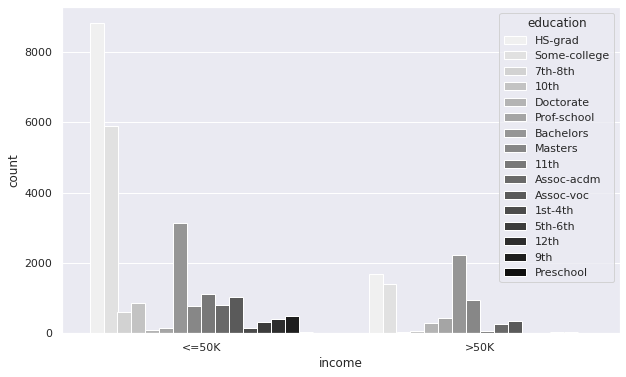

In [24]:
sns.countplot(x='income', hue='education', data=temp_file, palette = "gray_r")

#### **Observations:**
* Workers with `HS-grad` & `Some-college` level education predominantly earn less than 50K annually.
* Workers with a `Bachelors` degree contribute the most to the above 50K category.
* While `1st-4th`, `5th-6th`, `12th`, `9th` & `Preschool` might be earning 50K or less, they have no chance to earn more than 50K annually.

## **Building The Neural Network**

#### **Splitting the Encoded & Normalized Dataset into X & y**
X represents the input vectors and y represents the target vector

In [25]:
X = file.drop('Income', axis = 1)
y = file['Income']

In [26]:
import random
random.seed(10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

**BASE MODEL**

In [38]:
# Defining keras model
kerasmodel = Sequential()

# Hidden Layer 1 
kerasmodel.add(Dense(32, 
                     input_dim = 12, 
                     activation = "relu", 
                     kernel_initializer="random_normal", 
                     bias_initializer = "ones"))

keras.layers.Dropout(0.5, noise_shape=None, seed=None)

# Hidden Layer 2
kerasmodel.add(Dense(16, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

keras.layers.Dropout(0.5, noise_shape=None, seed=None)

# Hidden Layer 3
kerasmodel.add(Dense(8, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Output Layer
kerasmodel.add(Dense(1, 
                     activation = "sigmoid", 
                     kernel_initializer="random_normal"))

In [39]:
# Compiling The Model
kerasmodel.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [40]:
# Fitting the model
model_fit = kerasmodel.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

In [41]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 3s 3ms/step - loss: 0.3130 - accuracy: 0.8532
The Training accuracy is: 85.32 %


In [42]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [43]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 85.28 %


In [44]:
# Printing a Confusion Matrix

print("The Final Confusion Matrix is: \n", confusion_matrix(y_test, y_pred))

The Final Confusion Matrix is: 
 [[4701  219]
 [ 740  853]]


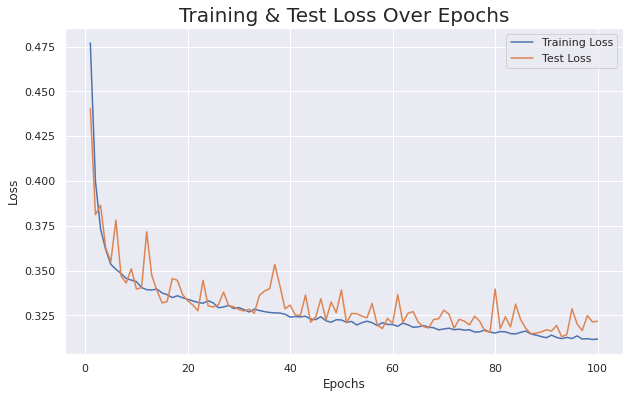

In [45]:
# Plotting Testing & Training Loss

plt.figure(figsize=(10, 6))

train_loss = model_fit.history['loss']
test_loss = model_fit.history['val_loss']

sns.lineplot(range(1, 101), train_loss, label="Training Loss")
sns.lineplot(range(1, 101), test_loss, label="Test Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Test Loss Over Epochs", fontsize = 20)
plt.legend()

plt.show()

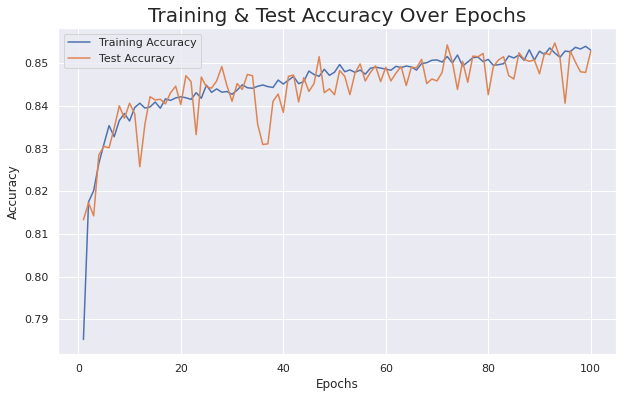

In [46]:
# Plotting Testing & Training Accuracy

plt.figure(figsize=(10, 6))

train_accuracy = model_fit.history['accuracy']
test_accuracy = model_fit.history['val_accuracy']

sns.lineplot(range(1, 101), train_accuracy, label="Training Accuracy")
sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

plt.show()

#### **Observations From The Graphs**

In [47]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + "Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + "Epoch.")

Most minimal Training Loss was observed at the 98Epoch.
The maximum Test Accuracy was observed at the 92Epoch.


####**PART II - OPTIMIZING NN**

Since we're about to define 9 models that are only about to differ in their hyperparameters, we've defined a function **ModelOptimizer** to keep the code optimized.

In [48]:
def ModelOptimizer(act_func_hidden, act_func_output, k_init_hidden, k_init_output, bias_init):
  kerasmodel = Sequential()
  # Hidden Layer 1
  kerasmodel.add(Dense(32, 
                      input_dim = 12, 
                      activation = act_func_hidden, 
                      kernel_initializer = k_init_hidden, 
                      bias_initializer = "ones"))
  # Hidden Layer 2
  kerasmodel.add(Dense(16, 
                      activation = act_func_hidden, 
                      kernel_initializer = k_init_hidden))
  # Hidden Layer 3
  kerasmodel.add(Dense(8, 
                      activation = act_func_hidden, 
                      kernel_initializer = k_init_hidden))

  # Output Layer
  kerasmodel.add(Dense(1, 
                      activation = act_func_output, 
                      kernel_initializer = k_init_output))
  
  return kerasmodel

def PlotLoss(model):
  plt.figure(figsize=(10, 6))

  train_loss = model.history['loss']
  test_loss = model.history['val_loss']

  sns.lineplot(range(1, 101), train_loss, label="Training Loss")
  sns.lineplot(range(1, 101), test_loss, label="Test Loss")

  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Training & Test Loss Over Epochs", fontsize = 20)
  plt.legend()

  plt.show()

def PlotAccuracy(model):
  plt.figure(figsize=(10, 6))

  train_accuracy = model.history['accuracy']
  test_accuracy = model.history['val_accuracy']

  sns.lineplot(range(1, 101), train_accuracy, label="Training Accuracy")
  sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy")

  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training & Test Accuracy Over Epochs", fontsize = 20)
  plt.legend()

  plt.show()

**1) Chosen Hyperparameter - Dropout**

**Changing the Dropout value to 0 in Setup 1**

**Setup 1 Hyperparameters**                                                                  
Dropout : 0                                                                    
Optimizer : Adam                                                                 
Activation Function: RELU, Sigmoid                                                
Initializer: Random Normal


In [49]:
# Calling The Model Defining Function
kerasmodel_1 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [50]:
# Compiling The Model
kerasmodel_1.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [51]:
# Fitting the model
model_fit_1 = kerasmodel_1.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [52]:
# Evaluating the model to know the Training Accuracy
accuracy = kerasmodel_1.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 3s 3ms/step - loss: 0.3137 - accuracy: 0.8515
The Training accuracy is: 85.15 %


In [53]:
# Calculating the y_pred to know the predicted target values
y_pred = kerasmodel_1.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [54]:
# Calculating Test Accuracy
print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 84.77 %


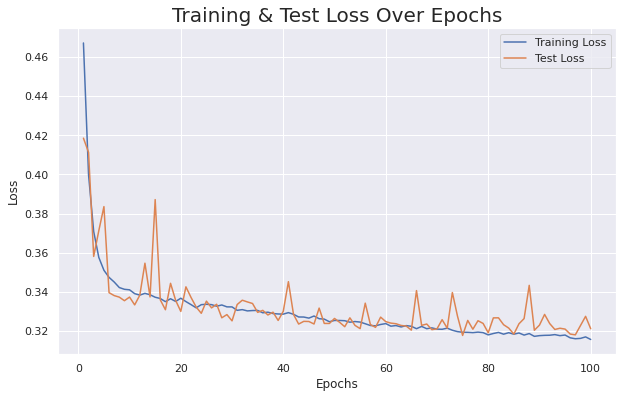

In [55]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_1)

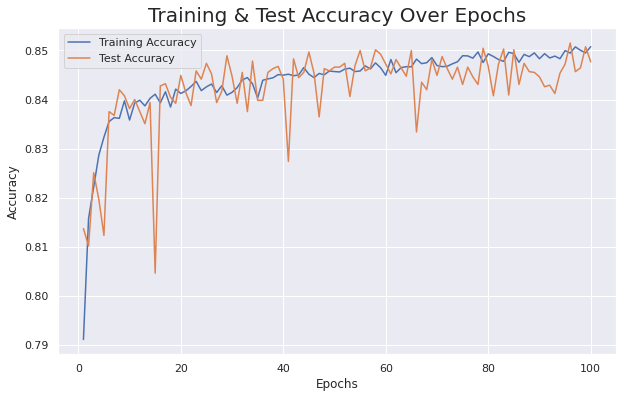

In [56]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_1)

**Observations from the graph**

In [57]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 98 Epoch.
The maximum Test Accuracy was observed at the 92 Epoch.


**Changing the Dropout to 0.2 in Setup 2**

**Setup 2 Hyperparameters**                                                                  
Dropout : 0.2                                                                    
Optimizer : Adam                                                                
Activation Function: RELU, Sigmoid                                                
Initializer: Random Normal

In [ ]:
# Calling The Model Defining Function
kerasmodel_2 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [ ]:
# Compiling The Model
kerasmodel_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_2 = kerasmodel_2.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_2.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.3045 - accuracy: 0.8555
The Training accuracy is: 85.55 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_2.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 85.18 %


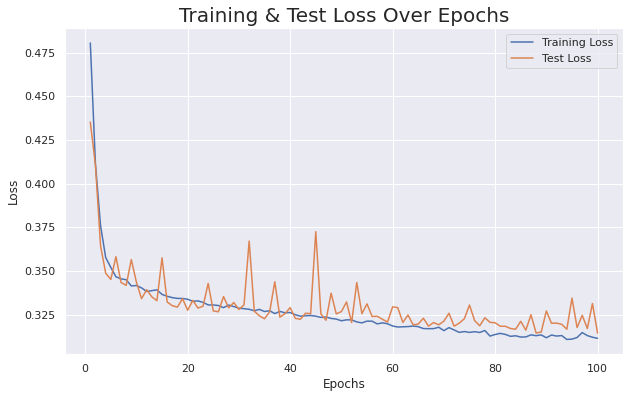

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_2)

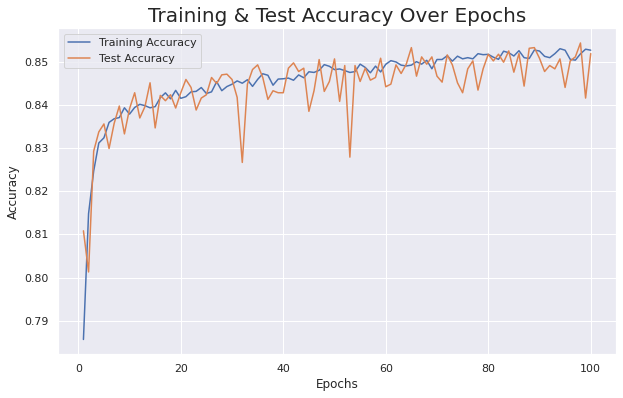

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_2)

**Observations from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


**Changing the Dropout to 0.8 in Setup 3**

**Setup 3 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : Adam                                                                 
Activation Function:  ReLu, Sigmoid                                                
Initializer: Random Normal

In [ ]:
# Calling The Model Defining Function
kerasmodel_3 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [ ]:
# Compiling The Model
kerasmodel_3.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_3 = kerasmodel_3.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_3.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.3139 - accuracy: 0.8521
The Training accuracy is: 85.21 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_3.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 85.12 %


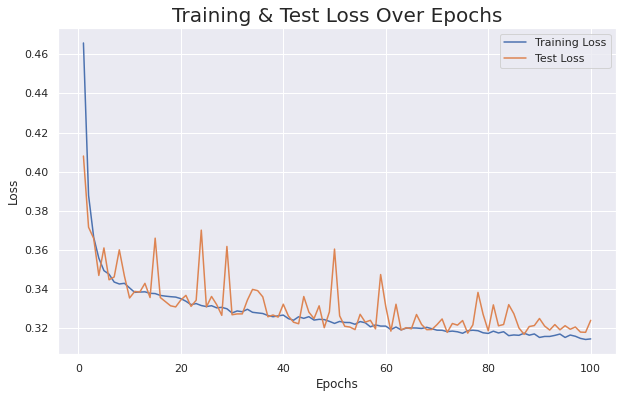

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_3)

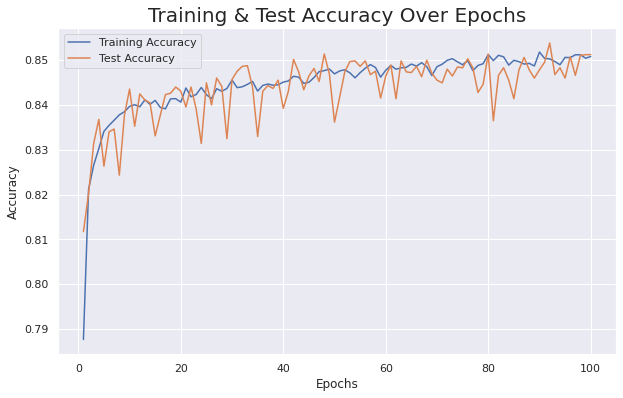

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_3)

**Observation from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


Model with dropout value 0.8 shows the highest training and test accuracy of **84.96%** and **85.00%** respectively. Hence, fixing dropout value of 0.8 for the next chosen hyperparameter.

####**Chosen Hyperparameter - Optimizer**

**Changing the Optimizer to AdaGrad for setup 4**

**Setup 4 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : AdaGrad                                                                 
Activation Function: ReLu, Sigmoid                                                
Initializer: Random Normal

In [ ]:
# Calling The Model Defining Function
kerasmodel_4 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name="Adagrad"
)
kerasmodel_4.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_4 = kerasmodel_4.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_4.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")



814/814 [==============================] - 2s 2ms/step - loss: 0.4457 - accuracy: 0.8069
The Training accuracy is: 80.69 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_4.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])


In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")


The Test Accuracy is: 80.15 %


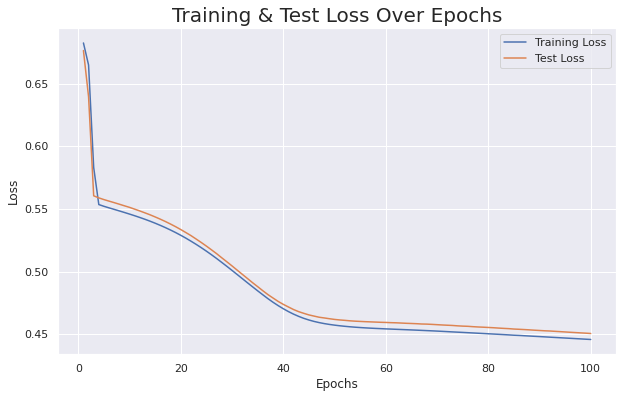

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_4)

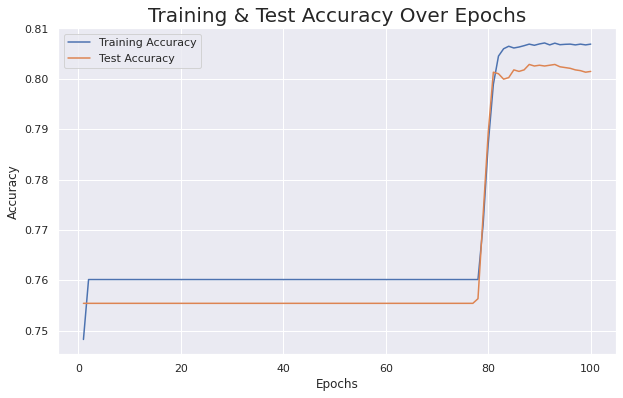

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_4)

**Observation from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


**Changing the Optimizer to AdaDelta for setup 5**

**Setup 5 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : AdaDelta                                                              
Activation Function: ReLu, Sigmoid                                                
Initializer: Random Normal

In [ ]:
# Calling The Model Defining Function
kerasmodel_5 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.Adadelta(
    learning_rate=0.001, 
    rho=0.95, 
    epsilon=1e-07, 
    name="Adadelta"
    )
kerasmodel_5.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_5 = kerasmodel_5.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_5.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7601
The Training accuracy is: 76.01 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_5.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 75.54 %


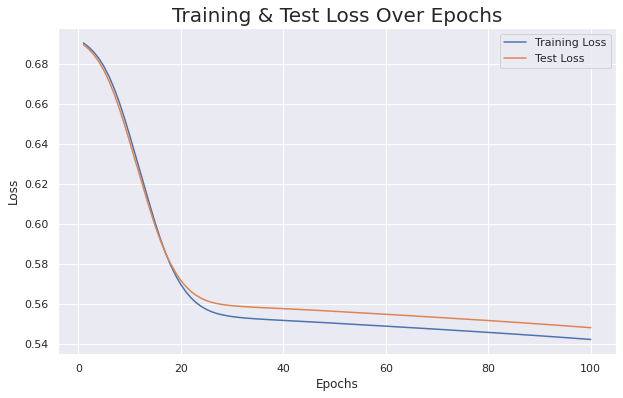

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_5)

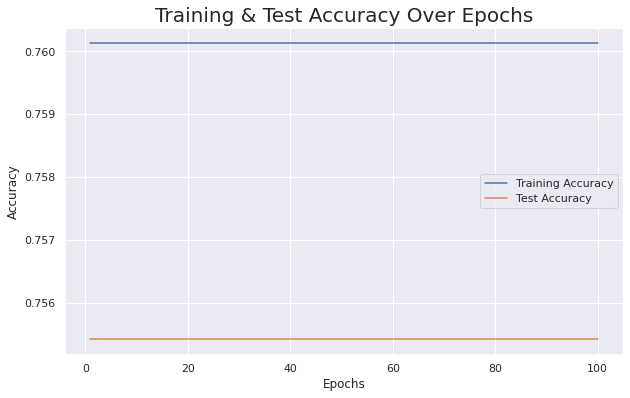

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_5)

**Observation from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


**Changing the Optimizer to RMSprop for setup 6**

**Setup 6 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : RMSprop                                                              
Activation Function: ReLu, Sigmoid                                                
Initializer: Random Normal

In [ ]:
# Calling The Model Defining Function
kerasmodel_6 = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)
kerasmodel_6.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_6 = kerasmodel_6.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_6.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")


814/814 [==============================] - 2s 2ms/step - loss: 0.3310 - accuracy: 0.8478
The Training accuracy is: 84.78 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_6.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])


In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")


The Test Accuracy is: 84.62 %


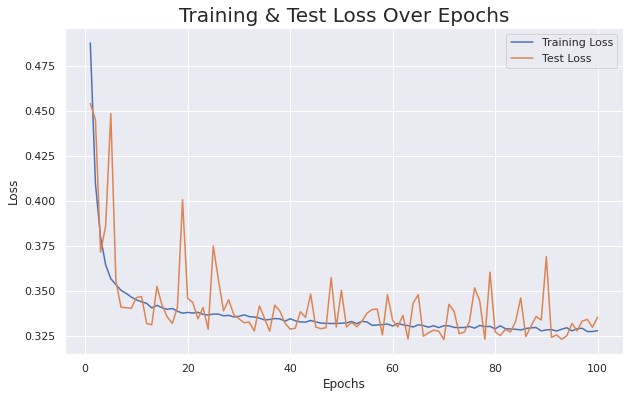

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_6)

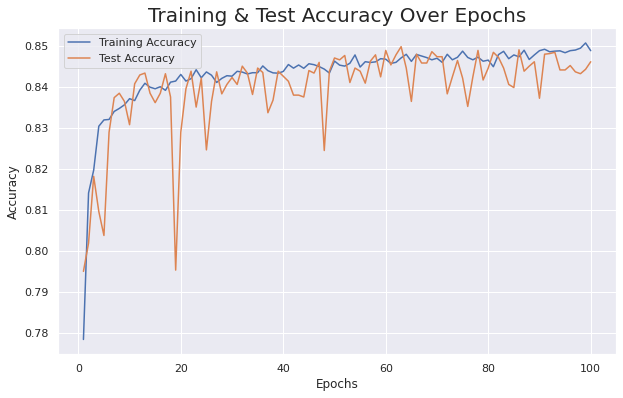

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_6)

**Observation from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


Model with **RMSprop optimizer** shows the highest training and test accuracy of **84.49%** and **84.71%** respectively. Hence, we choose the RMSprop optimizer.

**Chosen Hyperparameter - Initializer**

**Changing the Initializer to Random Uniform for setup 7**

**Setup 7 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : RMSprop                                                              
Activation Function: ReLu, Sigmoid                                                
Initializer: Random Uniform

In [ ]:
# Calling The Model Defining Function
kerasmodel_7 = ModelOptimizer("relu", "sigmoid", "random_uniform", "random_uniform", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)
kerasmodel_7.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_7 = kerasmodel_7.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_7.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8491
The Training accuracy is: 84.91 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_7.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 84.71 %


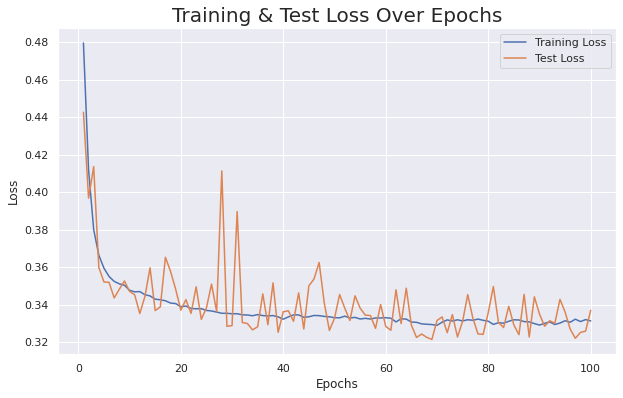

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_7)

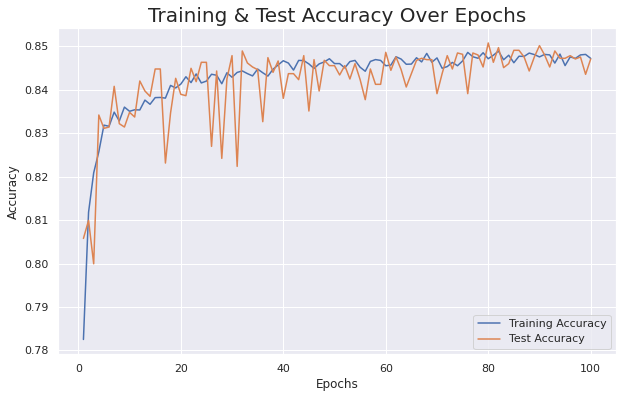

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_7)

**Observation from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.



**Changing the Initializer to Glorot Uniform for setup 8**

**Setup 8 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : RMSprop                                                              
Activation Function: ReLu, Sigmoid                                                
Initializer: Glorot Uniform

In [ ]:
# Calling The Model Defining Function
kerasmodel_8 = ModelOptimizer("relu", "sigmoid", "glorot_uniform", "glorot_uniform", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

kerasmodel_8.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
# Fitting the model
model_fit_8 = kerasmodel_8.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_8.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.3335 - accuracy: 0.8466
The Training accuracy is: 84.66 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_8.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 84.37 %


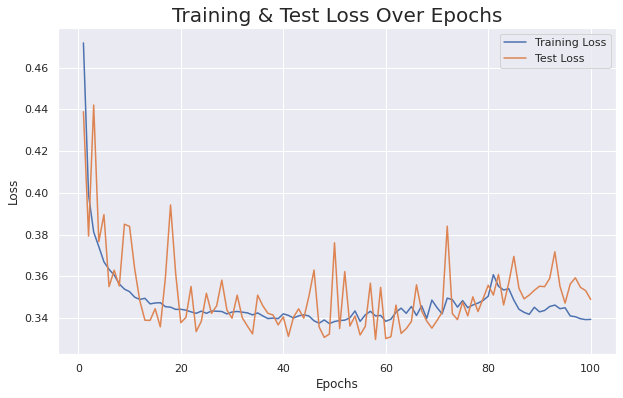

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_8)

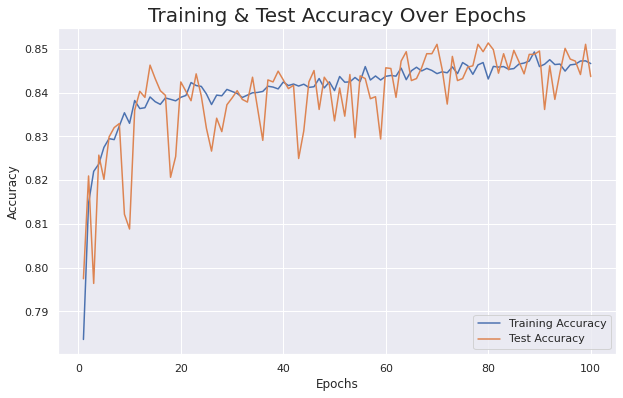

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_8)

**Observation from graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


**Changing the Initializer to He Uniform for setup 9**

**Setup 9 Hyperparameters**                                                                  
Dropout : 0.8                                                                    
Optimizer : RMSprop                                                              
Activation Function: ReLu, Sigmoid                                                
Initializer: He Uniform

In [ ]:
# Calling The Model Defining Function
kerasmodel_9 = ModelOptimizer("relu", "sigmoid", "he_uniform", "he_uniform", "ones")

In [ ]:
# Compiling The Model
optimizer = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)
kerasmodel_9.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])


In [ ]:
# Fitting the model
model_fit_9 = kerasmodel_9.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)


In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_9.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")


814/814 [==============================] - 2s 2ms/step - loss: 0.3297 - accuracy: 0.8479
The Training accuracy is: 84.79 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_9.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])


In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")


The Test Accuracy is: 84.29 %


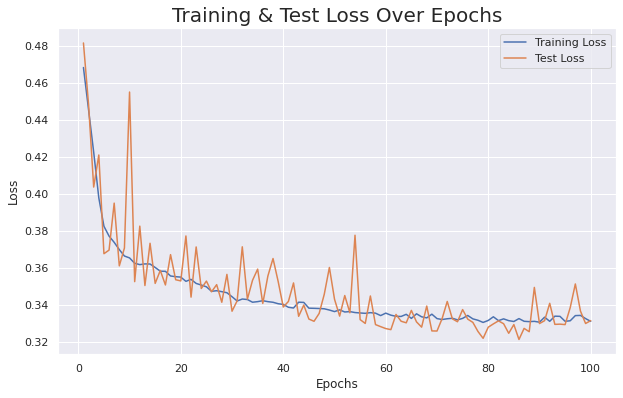

In [ ]:
# Plotting Testing & Training Loss
PlotLoss(model_fit_9)

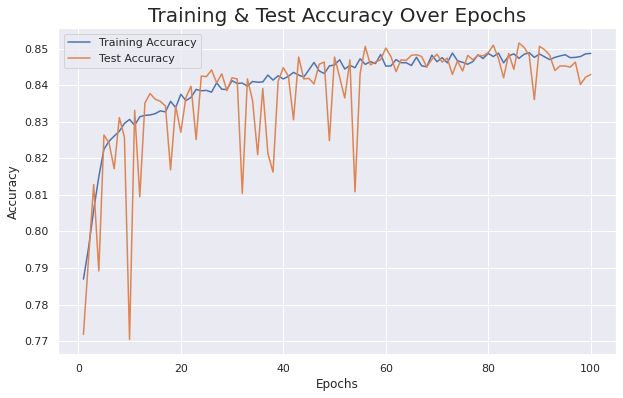

In [ ]:
# Plotting Testing & Training Accuracy
PlotAccuracy(model_fit_9)

**Observation from graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 88 Epoch.


From the above models, the highest accuracy of **85.16%** is obtained for model setup 1 with chosen fixed hyperparameter dropout : **Dropout - 0, Optimizer - Adam, Activation function : ReLu and Sigmoid, Initializer - Random Normal**

Using the **model setup 1** for the next step.

For step 3, use 4 different methods to improve the training speed, accuracy

### **Method 1: Using Early Stopping**

In [ ]:
# Defining keras model
kerasmodel_1_es = Sequential()

# Hidden Layer 1 
kerasmodel_1_es.add(Dense(32, 
                     input_dim = 12, 
                     activation = "relu", 
                     kernel_initializer="random_normal", 
                     bias_initializer = "ones"))

# Hidden Layer 2
kerasmodel_1_es.add(Dense(16, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Hidden Layer 3
kerasmodel_1_es.add(Dense(8, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Output Layer
kerasmodel_1_es.add(Dense(1, 
                     activation = "sigmoid", 
                     kernel_initializer="random_normal"))


In [ ]:
# Compiling The Model
kerasmodel_1_es.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
# Fitting the model
early_stopping = EarlyStopping(monitor ='val_loss', mode = "min", patience = 5, verbose = 1)
model_fit_1_es = kerasmodel_1.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test),
                           callbacks = [early_stopping], 
                           shuffle=True)


Epoch 1/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3151 - accuracy: 0.8510 - val_loss: 0.3247 - val_accuracy: 0.8485
Epoch 2/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3155 - accuracy: 0.8511 - val_loss: 0.3232 - val_accuracy: 0.8498
Epoch 3/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3162 - accuracy: 0.8511 - val_loss: 0.3178 - val_accuracy: 0.8509
Epoch 4/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3153 - accuracy: 0.8518 - val_loss: 0.3189 - val_accuracy: 0.8497
Epoch 5/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3141 - accuracy: 0.8502 - val_loss: 0.3188 - val_accuracy: 0.8491
Epoch 6/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3141 - accuracy: 0.8500 - val_loss: 0.3465 - val_accuracy: 0.8337
Epoch 7/100
1303/1303 [==============================] - 4s 3ms/step - loss: 0.3151 - accuracy: 0.8493 - val_loss: 0.3238 - val_ac

In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_1_es.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")


814/814 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.7583
The Training accuracy is: 75.83 %


In [ ]:
# Calculating the y_pred to know the predicted target values

y_pred = kerasmodel_1_es.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])


In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")


The Test Accuracy is: 75.36 %


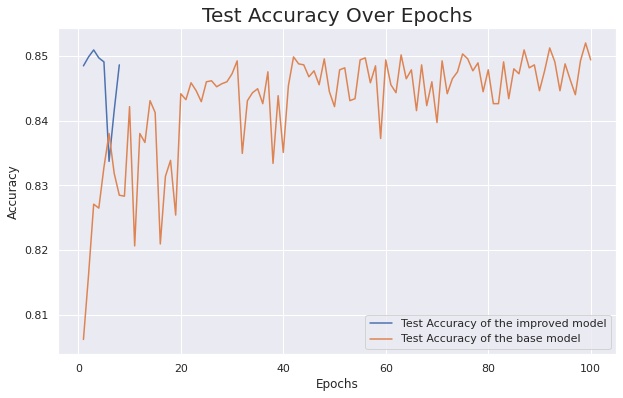

In [ ]:
# Plotting Testing & Training Accuracy

plt.figure(figsize=(10, 6))

test_accuracy_es = model_fit_1_es.history['val_accuracy']
test_accuracy = model_fit_1.history['val_accuracy']

sns.lineplot(range(1, len(test_accuracy_es) + 1), test_accuracy_es, label="Test Accuracy of the improved model")
sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy of the base model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

plt.show()


**Observations from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy_es)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 2 Epoch.


From the graph, it can be observed that on using **Early Stopping** callback, the maximum accuracy has been achieved at the **20th epoch** when compared to the base model (with no call backs) were maximum accuracy was obtained in the **100th epoch**.

### **Method 2: Model Check Point**

In [ ]:
# Defining keras model
kerasmodel_1_mcp = Sequential()

# Hidden Layer 1 
kerasmodel_1_mcp.add(Dense(32, 
                     input_dim = 12, 
                     activation = "relu", 
                     kernel_initializer="random_normal", 
                     bias_initializer = "ones"))

# Hidden Layer 2
kerasmodel_1_mcp.add(Dense(16, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Hidden Layer 3
kerasmodel_1_mcp.add(Dense(8, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Output Layer
kerasmodel_1_mcp.add(Dense(1, 
                     activation = "sigmoid", 
                     kernel_initializer="random_normal"))

In [ ]:
# Compiling The Model
kerasmodel_1_mcp.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
# Fitting the model
model_check_point = ModelCheckpoint("model.h5", monitor = "val_loss", save_best_only = True, mode = "min", patience = 5, verbose = 1)
model_fit_1_mcp = kerasmodel_1_mcp.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test),
                           callbacks = [model_check_point], 
                           shuffle=True,
                           verbose = 0)


Epoch 1: val_loss improved from inf to 0.42951, saving model to model.h5

Epoch 2: val_loss improved from 0.42951 to 0.38095, saving model to model.h5

Epoch 3: val_loss improved from 0.38095 to 0.36567, saving model to model.h5

Epoch 4: val_loss improved from 0.36567 to 0.35842, saving model to model.h5

Epoch 5: val_loss improved from 0.35842 to 0.35442, saving model to model.h5

Epoch 6: val_loss improved from 0.35442 to 0.35293, saving model to model.h5

Epoch 7: val_loss improved from 0.35293 to 0.34844, saving model to model.h5

Epoch 8: val_loss improved from 0.34844 to 0.34120, saving model to model.h5

Epoch 9: val_loss did not improve from 0.34120

Epoch 10: val_loss improved from 0.34120 to 0.33960, saving model to model.h5

Epoch 11: val_loss improved from 0.33960 to 0.33840, saving model to model.h5

Epoch 12: val_loss did not improve from 0.33840

Epoch 13: val_loss improved from 0.33840 to 0.33727, saving model to model.h5

Epoch 14: val_loss did not improve from 0.337

In [ ]:
# Evaluating the model to know the Training Accuracy

accuracy = kerasmodel_1_mcp.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 2s 2ms/step - loss: 0.3060 - accuracy: 0.8557
The Training accuracy is: 85.57 %


In [ ]:
# Calculating the y_pred to know the predicted target values
y_pred = kerasmodel_1_mcp.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [ ]:
# Calculating Test Accuracy

print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 85.40 %


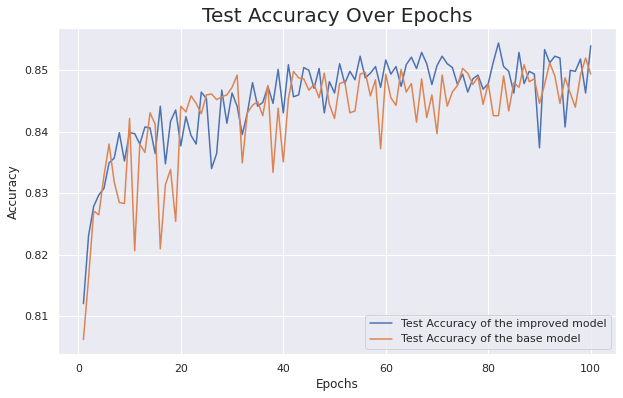

In [ ]:
# Plotting Testing & Training Accuracy

plt.figure(figsize=(10, 6))

test_accuracy_mcp = model_fit_1_mcp.history['val_accuracy']
test_accuracy = model_fit_1.history['val_accuracy']

sns.lineplot(range(1, len(test_accuracy_mcp) + 1), test_accuracy_mcp, label="Test Accuracy of the improved model")
sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy of the base model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

plt.show()

#### **Observations from the graph**

In [ ]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy_es)) + " Epoch.")

Most minimal Training Loss was observed at the 97 Epoch.
The maximum Test Accuracy was observed at the 2 Epoch.


### **Method 3: K-Fold Validation**
We've used k = 5

In [58]:
from sklearn.model_selection import KFold

# Defining KFold
folds = 5
kfold = KFold(n_splits= folds)

# Concatenating (X_train, X_test) & (Y_train, y_test)
X_values = np.concatenate((X_train, X_test))
y_values = np.concatenate((y_train, y_test))

# Performing K Fold Validation
fold = 1
k_loss, k_accuracy = [], []

for train, test in kfold.split(X_values, y_values):
  model_k = ModelOptimizer("relu", "sigmoid", "random_normal", "random_normal", "ones")
  model_k.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
  print('Currently running ---> ' + "Fold " + str(fold))
  model_fit_k = model_k.fit(X_values[train], y_values[train], 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data = (X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

  scores = model_k.evaluate(X_values[test], y_values[test], verbose=0)
  print('Model Loss: ' + str(scores[0]) + '; Model Accuracy: ' + str(round(scores[1]*100,2)) + '%' + '\n')
  k_loss.append(scores[0])
  k_accuracy.append(scores[1])


  # Increasing the number of folds
  fold = fold + 1

Currently running ---> Fold 1
Model Loss: 0.3211737871170044; Model Accuracy: 84.97%

Currently running ---> Fold 2
Model Loss: 0.3274216949939728; Model Accuracy: 84.9%

Currently running ---> Fold 3
Model Loss: 0.3221827745437622; Model Accuracy: 85.24%

Currently running ---> Fold 4
Model Loss: 0.3208010792732239; Model Accuracy: 84.34%

Currently running ---> Fold 5
Model Loss: 0.32262569665908813; Model Accuracy: 85.0%



In [59]:
accuracy = model_k.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

# Calculating the y_pred to know the predicted target values
y_pred = model_k.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

# Calculating Test Accuracy
print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

814/814 [==============================] - 3s 3ms/step - loss: 0.3164 - accuracy: 0.8488
The Training accuracy is: 84.88 %
The Test Accuracy is: 85.00 %


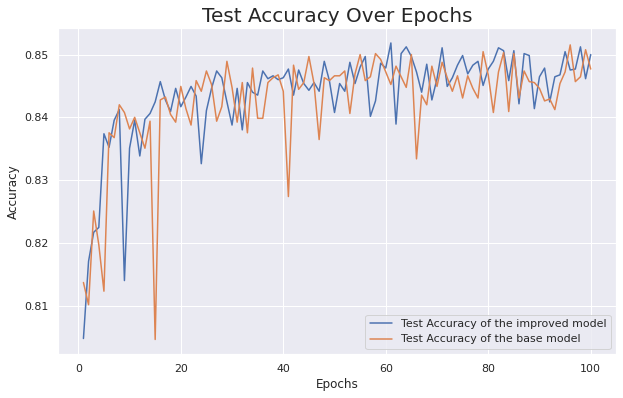

In [60]:
    test_accuracy_k = model_fit_k.history['val_accuracy']
    test_accuracy = model_fit_1.history['val_accuracy']

    sns.lineplot(range(1, len(test_accuracy_k) + 1), test_accuracy_k, label="Test Accuracy of the improved model")
    sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy of the base model")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Test Accuracy Over Epochs", fontsize = 20)
    plt.legend()

    plt.show()

In [62]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy_k)) + " Epoch.")

Most minimal Training Loss was observed at the 98 Epoch.
The maximum Test Accuracy was observed at the 60 Epoch.


#### **Method 4: Batch Normalization**

In [63]:
from keras.layers import BatchNormalization

# Defining keras model
kerasmodel_bn = Sequential()

# Hidden Layer 1 
kerasmodel_bn.add(Dense(32, 
                     input_dim = 12, 
                     activation = "relu", 
                     kernel_initializer="random_normal", 
                     bias_initializer = "ones"))

kerasmodel_bn.add(BatchNormalization(beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros", moving_variance_initializer="ones"))
keras.layers.Dropout(0.5, noise_shape=None, seed=None)

# Hidden Layer 2
kerasmodel_bn.add(Dense(16, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# keras.layers.Dropout(0.5, noise_shape=None, seed=None)

kerasmodel_bn.add(BatchNormalization(beta_initializer="zeros", gamma_initializer="ones", moving_mean_initializer="zeros", moving_variance_initializer="ones"))

# Hidden Layer 3
kerasmodel_bn.add(Dense(8, 
                     activation = "relu", 
                     kernel_initializer="random_normal"))

# Output Layer
kerasmodel_bn.add(Dense(1, 
                     activation = "sigmoid", 
                     kernel_initializer="random_normal"))

kerasmodel_bn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])

model_fit_bn = kerasmodel_bn.fit(X_train, y_train, 
                           epochs = 100, 
                           batch_size = 20, 
                           validation_data=(X_test, y_test), 
                           shuffle=True,
                           verbose = 0)

In [64]:
accuracy = kerasmodel_bn.evaluate(X_train, y_train)[-1]
print('The Training accuracy is: %.2f' % (accuracy*100), "%")

814/814 [==============================] - 3s 3ms/step - loss: 0.3245 - accuracy: 0.8474
The Training accuracy is: 84.74 %


In [65]:
# Calculating the y_pred to know the predicted target values
y_pred = kerasmodel_bn.predict(X_test)
y_pred = np.array([1 if x >= 0.5 else 0 for x in y_pred])

In [66]:
# Calculating Test Accuracy
print("The Test Accuracy is: %.2f" % (accuracy_score(y_test, y_pred)*100), "%")

The Test Accuracy is: 84.80 %


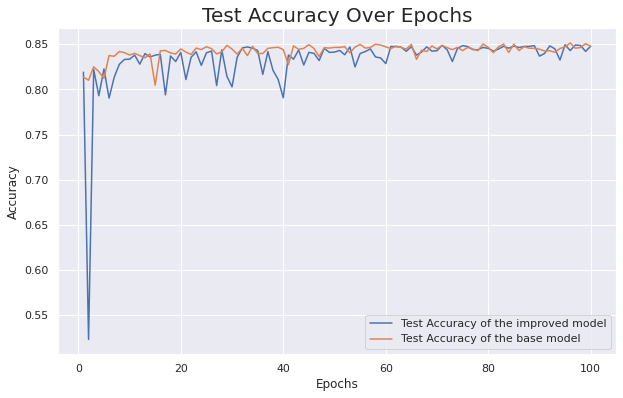

In [67]:
# Plotting Testing & Training Loss

plt.figure(figsize=(10, 6))

test_accuracy_bn = model_fit_bn.history['val_accuracy']
test_accuracy = model_fit_1.history['val_accuracy']

sns.lineplot(range(1, len(test_accuracy_bn) + 1), test_accuracy_bn, label="Test Accuracy of the improved model")
sns.lineplot(range(1, 101), test_accuracy, label="Test Accuracy of the base model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Test Accuracy Over Epochs", fontsize = 20)
plt.legend()

plt.show()

#### **Observations from the graph**

In [68]:
print("Most minimal Training Loss was observed at the " + str(np.argmin(train_loss)) + " Epoch.")
print("The maximum Test Accuracy was observed at the " + str(np.argmax(test_accuracy_bn)) + " Epoch.")

Most minimal Training Loss was observed at the 98 Epoch.
The maximum Test Accuracy was observed at the 94 Epoch.
